In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.415569,0.707451,-6.014510e-07,0.492598,0.649255,-0.015493,0.535171,0.551677,-0.016015,0.551790,...,0.398867,0.447814,-0.031962,0.403077,0.513780,-0.017992,0.382900,0.533670,0.000044,A
1,0.383157,0.705476,-3.902652e-07,0.459068,0.681768,-0.021066,0.519991,0.591640,-0.023375,0.547922,...,0.393618,0.455356,-0.026020,0.390099,0.519671,-0.010454,0.373084,0.534647,0.007537,A
2,0.442802,0.720691,-6.299302e-07,0.519509,0.669234,-0.016808,0.565608,0.574118,-0.017538,0.584066,...,0.433521,0.448486,-0.031750,0.434974,0.511373,-0.016801,0.419079,0.532495,0.001692,A
3,0.422893,0.741511,-7.332600e-07,0.506524,0.686827,-0.015027,0.554081,0.591354,-0.015149,0.570833,...,0.413811,0.464850,-0.033043,0.415446,0.532655,-0.017781,0.399077,0.553694,0.000817,A
4,0.402343,0.740938,-6.663715e-07,0.486506,0.689135,-0.017238,0.538544,0.598364,-0.020553,0.559193,...,0.402742,0.470470,-0.037179,0.402873,0.539379,-0.020480,0.385635,0.558936,-0.000715,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.616646,0.877319,-5.442566e-07,0.538972,0.882231,0.023235,0.489311,0.836652,0.022278,0.446930,...,0.439666,0.734924,-0.099771,0.403573,0.775726,-0.099738,0.398371,0.819042,-0.096689,D
214,0.653053,0.913793,-7.561836e-07,0.559416,0.894361,0.001641,0.491905,0.828346,-0.005927,0.441965,...,0.512014,0.712593,-0.096329,0.469103,0.752548,-0.099156,0.459531,0.802328,-0.094314,D
215,0.624499,0.886251,-4.062919e-07,0.547214,0.891537,0.025122,0.489576,0.849250,0.023518,0.441484,...,0.440907,0.758050,-0.108897,0.404674,0.799393,-0.110363,0.400010,0.840433,-0.107976,D
216,0.617337,0.888987,-6.410314e-07,0.531705,0.858150,0.016702,0.466226,0.795376,0.014476,0.412511,...,0.474756,0.671159,-0.078203,0.432374,0.701617,-0.079195,0.419831,0.741825,-0.075086,D


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.415569,0.707451,-6.014510e-07,0.492598,0.649255,-0.015493,0.535171,0.551677,-0.016015,0.551790,...,0.398867,0.447814,-0.031962,0.403077,0.513780,-0.017992,0.382900,0.533670,0.000044,A
1,0.383157,0.705476,-3.902652e-07,0.459068,0.681768,-0.021066,0.519991,0.591640,-0.023375,0.547922,...,0.393618,0.455356,-0.026020,0.390099,0.519671,-0.010454,0.373084,0.534647,0.007537,A
2,0.442802,0.720691,-6.299302e-07,0.519509,0.669234,-0.016808,0.565608,0.574118,-0.017538,0.584066,...,0.433521,0.448486,-0.031750,0.434974,0.511373,-0.016801,0.419079,0.532495,0.001692,A
3,0.422893,0.741511,-7.332600e-07,0.506524,0.686827,-0.015027,0.554081,0.591354,-0.015149,0.570833,...,0.413811,0.464850,-0.033043,0.415446,0.532655,-0.017781,0.399077,0.553694,0.000817,A
4,0.402343,0.740938,-6.663715e-07,0.486506,0.689135,-0.017238,0.538544,0.598364,-0.020553,0.559193,...,0.402742,0.470470,-0.037179,0.402873,0.539379,-0.020480,0.385635,0.558936,-0.000715,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.616646,0.877319,-5.442566e-07,0.538972,0.882231,0.023235,0.489311,0.836652,0.022278,0.446930,...,0.439666,0.734924,-0.099771,0.403573,0.775726,-0.099738,0.398371,0.819042,-0.096689,D
214,0.653053,0.913793,-7.561836e-07,0.559416,0.894361,0.001641,0.491905,0.828346,-0.005927,0.441965,...,0.512014,0.712593,-0.096329,0.469103,0.752548,-0.099156,0.459531,0.802328,-0.094314,D
215,0.624499,0.886251,-4.062919e-07,0.547214,0.891537,0.025122,0.489576,0.849250,0.023518,0.441484,...,0.440907,0.758050,-0.108897,0.404674,0.799393,-0.110363,0.400010,0.840433,-0.107976,D
216,0.617337,0.888987,-6.410314e-07,0.531705,0.858150,0.016702,0.466226,0.795376,0.014476,0.412511,...,0.474756,0.671159,-0.078203,0.432374,0.701617,-0.079195,0.419831,0.741825,-0.075086,D


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (218, 63)
Labels shape = (218,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['D', 'Đ', 'none', 'C', 'none', 'D', 'B', 'Đ', 'Đ', 'A', 'none',
       'Đ', 'C', 'none', 'B', 'C', 'D', 'D', 'A', 'C', 'B', 'B', 'Đ', 'C',
       'B', 'C', 'A', 'C', 'A', 'D', 'C', 'A', 'B', 'none', 'B', 'B', 'B',
       'B', 'A', 'B', 'B', 'D', 'B', 'D'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

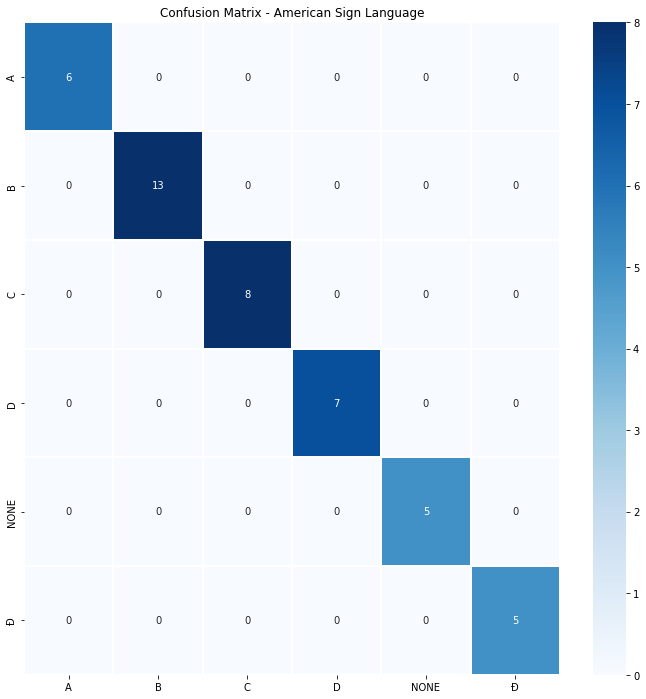

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)